# Task 2.  Algorithms for unconstrained nonlinear optimization. Direct methods

### 2.1 Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision $\varepsilon = 0.001$) solution $x: f(x) \rightarrow min $ for the following functions and domains:

### $1) f(x) = x^3, x \in [0, 1]$
### $2) f(x) = |x - 0.2|, x \in [0, 1]$
### $3) f(x) = x \sin{\frac{1}{x}}, x \in [0.01, 1]$

### Calculate the number of $f$-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.

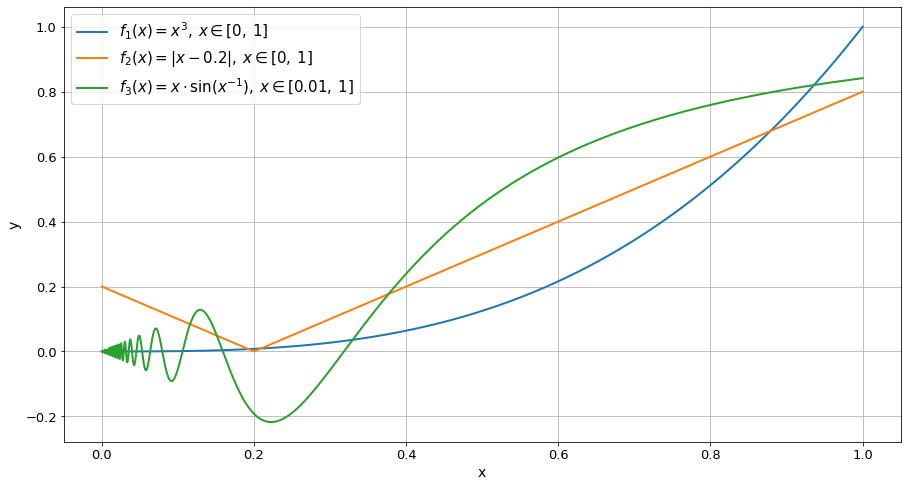

In [555]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


# Visualization - just to understand the correctness of further results
fig = plt.figure(figsize = (15, 8))
x_arr = np.linspace(0, 1, 5000)

func_arr = [lambda x: x ** 3, lambda x: abs(x - 0.2), lambda x: x * np.sin(1 / x)]
    
func_descr_arr = [r'$f_1(x) = x^3, \: x \in [0, \: 1]$',\
                  r'$f_2(x) = |x - 0.2|, \: x \in [0, \: 1]$',\
                  r'$f_3(x) = x\cdot\sin{(x^{-1})}, \: x \in [0.01, \: 1]$']

for func_num in range(3):

    plt.plot(x_arr[(func_num + 1) // 3:], func_arr[func_num](x_arr[(func_num + 1) // 3:]), linewidth = 2.0)
    plt.grid()
    
plt.legend(func_descr_arr, prop = {'size': 15}, loc = 'upper left')
plt.xlabel('x', size = 14)
plt.ylabel('y', size = 14)
plt.show()

In [556]:

def exhaustive_search(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ exhaustive_search is a brute-force search of the value
        of x in area [a, b], where the func takes the minimum.

        eps means calculation error and equals 1e-3 by default """ 
    
    nodes_num = int(1 + (right_boundary - left_boundary) / eps)     # number of nodes in grid == len(grid)
    grid = np.linspace(left_boundary, right_boundary, nodes_num)    # grid of values of x
    
    func_eval_num = 0                                               # number of function evaluations
    iter_num = 0                                                    # number of iterations
    
    x_min = grid[0]
    func_min = func(x_min)
    func_eval_num += 1
        
    for i in range(1, nodes_num):
        
        func_curr = func(grid[i])
        func_eval_num += 1
        iter_num += 1

        if func_curr < func_min:
            
            x_min = grid[i]
            func_min = func_curr
    
    return x_min, func_eval_num, iter_num


def dichotomy_method(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ dichotomy_method is a search of the value of x_min in area
        [a, b] by sequential dividing specified area in two pieces.
        
        the method calculates only the interval [a_i, b_i], in which
        the desired x_min value lies.

        eps means calculation error and equals 1e-3 by default """
        
    func_eval_num = 0                                               # function evaluation and iterations counters
    iter_num = 0
    
    a_i = left_boundary                                             # left and right borders of searching area on i-th iterarion
    b_i = right_boundary
    
    delta = eps / 2                                                 # let delta be eps / 2

    while abs(a_i - b_i) >= eps:
        
        x_1 = (a_i + b_i - delta) / 2
        x_2  = (a_i + b_i + delta) / 2
        
        if func(x_1) <= func(x_2):
            b_i = x_2
        else:
            a_i = x_1
            
        func_eval_num += 2
        iter_num += 1

    return a_i, b_i, func_eval_num, iter_num                        # value of x_min will be between a_i and b_i


def golden_section_method(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ golden_section_method is a modification of dichotomy method
        with the value of delta equals to the golden section.
        
        the method also calculates only the interval [a_i, b_i],
        in which the desired x_min value lies.

        eps means calculation error and equals 1e-3 by default """

    
    func_eval_num = 0                                               # function evaluation and iterations counters
    iter_num = 0
    
    a_i = left_boundary                                             # left and right borders of searching area on i-th iterarion
    b_i = right_boundary

    while abs(a_i - b_i) >= eps:
        
        if not iter_num:                                            # this step for the 1-st iteration only 
            
            delta = (3 - np.sqrt(5)) * (b_i - a_i) / 2
            
            x_1 = a_i + delta
            x_2 = b_i - delta
            
            func_x_1 = func(x_1)
            func_x_2 = func(x_2)
            
            func_eval_num += 2
            
        if func_x_1 <= func_x_2:                                    # if the minimum is on the left side
            
            b_i = x_2
            x_2 = x_1
            x_1 = a_i + (3 - np.sqrt(5)) * (b_i - a_i) / 2

            func_x_2 = func_x_1
            func_x_1 = func(x_1)
            
            func_eval_num += 1
            
        else:                                                       # if the minimum is on the right side
            
            a_i = x_1
            x_1 = x_2
            x_2 = b_i - (3 - np.sqrt(5)) * (b_i - a_i) / 2
            
            func_x_1 = func_x_2
            func_x_2 = func(x_2)
            
            func_eval_num += 1

        iter_num += 1
        
    return a_i, b_i, func_eval_num, iter_num                        # value of x_min will be between a_i and b_i


# Test
func_eval_dict = {'exhaustive_search': [], 'dichotomy_method': [], 'golden_section_method': []}
iter_dict = {'exhaustive_search': [], 'dichotomy_method': [], 'golden_section_method': []}


for func_num in range(3):
    
    print('')
    
    display(Math(func_descr_arr[func_num]))
    
    (res, func_eval_ex, iter_num_ex) = exhaustive_search(func_arr[func_num], \
                                                         (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: exhaustive \: search: x_{' + str(func_num + 1) + '}^{min} = ' + str(round(res, 3))))
    
    func_eval_dict['exhaustive_search'].append(func_eval_ex)
    iter_dict['exhaustive_search'].append(iter_num_ex)
    
    (left, right, func_eval_d, iter_num_d) = dichotomy_method(func_arr[func_num], \
                                                              (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: dichotomy \: method: x_{' + str(func_num + 1) + \
                 '}^{min}  \in [' + str(round(left, 3)) + ', ' + str(round(right, 3)) + ']')) 
    
    func_eval_dict['dichotomy_method'].append(func_eval_d)
    iter_dict['dichotomy_method'].append(iter_num_d)
    
    (left, right, func_eval_g, iter_num_g) = golden_section_method(func_arr[func_num], \
                                                                   (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: golden \: dection \: method: x_{' + str(func_num + 1) + \
                 '}^{min} \in [' + str(round(left, 3)) + ', ' + str(round(right, 3)) + ']'))
    
    func_eval_dict['golden_section_method'].append(func_eval_g)
    iter_dict['golden_section_method'].append(iter_num_g)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

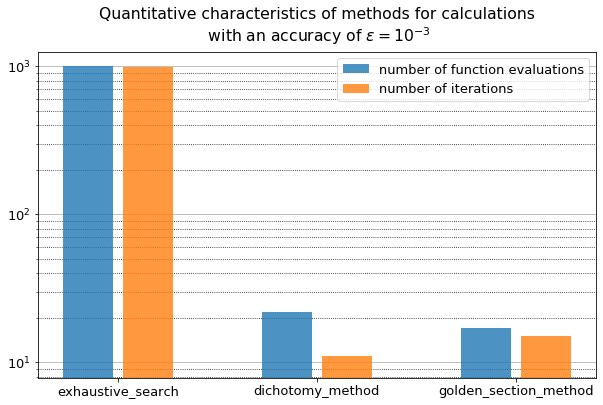

In [557]:
alg_names = [key for key in func_eval_dict.keys()]

for key in alg_names:
    func_eval_dict[key] = int(np.mean(func_eval_dict[key]))
    iter_dict[key] = int(np.mean(iter_dict[key]))
    
    
mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title('Quantitative characteristics of methods for calculations' + \
          '\n with an accuracy of $\epsilon = 10^{-3}$', pad = 10)

xs = range(len(alg_names))

plt.yscale('log')
plt.bar([x  for x in xs], [func_eval_dict[key] for key in alg_names], \
        width = 0.25, alpha = 0.8, label = 'number of function evaluations', zorder = 2)
plt.bar([x + 0.3 for x in xs], [iter_dict[key] for key in alg_names],
        width = 0.25, alpha = 0.8, label = 'number of iterations', zorder = 2)

plt.xticks([i + 0.15 for i in xs], alg_names)
plt.legend(loc = 'upper right')

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

#fig.autofmt_xdate(rotation = 25)
fig.savefig('bars.png')

In [558]:
for func_num in range(3):
    print(exhaustive_search(func_arr[func_num], (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1))
    
print('')

for func_num in range(3):
    print(dichotomy_method(func_arr[func_num], (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1))
    
print('')

for func_num in range(3):
    print(golden_section_method(func_arr[func_num], (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1))


(0.0, 1001, 1000)
(0.2, 1001, 1000)
(0.223, 991, 990)

(0, 0.0009880371093750001, 22, 11)
(0.19960717773437495, 0.20059521484374995, 22, 11)
(0.22210473632812497, 0.22308789062499995, 22, 11)

(0, 0.000733137435857404, 17, 15)
(0.199706745025657, 0.2004398824615144, 17, 15)
(0.22235669058885382, 0.22308249665035265, 17, 15)


### 2.2 Generate random numbers $\alpha \in (0, 1)$  and $\beta \in (0, 1)$. Furthermore, generate the noisy data {$x_k, y_k$}, where $k = 0, 1, .. 100$, according to the rule: $x_k = \frac{k}{100}$, ${y_k = \alpha x_k + \beta + \delta_k}$, where $\delta_k \sim N(0, 1)$ are values of a random variable with standard normal distribution. Approximate the data by the following linear and rational functions:

### $1) F(x, a, b) = ax + b$ (linear approximant)
### $2) F(x, a, b) = \frac{a}{1 + bx}$ (rational approximant)

### by means of least squares through the numerical minimization (with precision $\varepsilon = 0.001$) of the following function:

### $D(a, b) = \sum\limits_{k = 0}^{100}{(F(x_k, a, b) - y_k)^2}$

### To solve the minimization problem, use the methods of exhaustive search, Gauss and Nelder-Mead. If necessary, set the initial approximations and other parameters of the methods. Visualize the data and the approximants obtained in a plot separately for each type of approximant so that one can compare the results for the numerical methods used. Analyze the results obtained (in terms of number of iterations, precision, number of function evaluations, etc.).

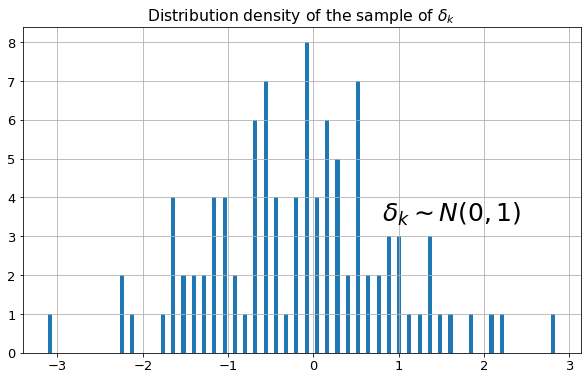

In [559]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization - just to understand the correctness of further results

mu, sigma = 0, 1
np.random.seed(12)
delta_arr = np.random.normal(mu, sigma, 101)

fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(delta_arr, bins = 50, rwidth = 0.4)
ax.text(x = 0.8, y = 3.4, s = r'$\delta_k \sim N(0, 1)$',
        fontsize = 25)

plt.title('Distribution density of the sample of $\delta_k$')
plt.grid()
plt.show()

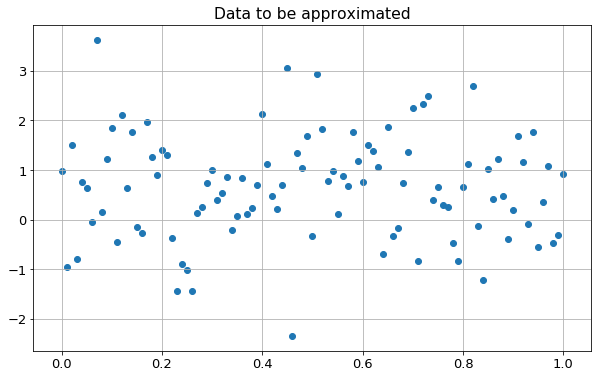

In [560]:
np.random.seed(12)
alpha, beta = np.random.random(), np.random.random()                # random parameters for approximant function

el_num = 101                                                        # number of known values of x_k, y_k and delta_k
mu, sigma = 0, 1                                                    # mean and standard deviation in N(0, 1)
delta_arr = np.random.normal(mu, sigma, el_num)                     # array of delta_k

x_arr = np.linspace(0, 1, el_num)                                   # independent variable x
y_arr = alpha * x_arr + beta * np.ones(el_num) + delta_arr          # dependent variable y(x, delta)

plt.figure(figsize = (10, 6))
plt.scatter(x_arr, y_arr)
plt.title('Data to be approximated')
plt.grid()

C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


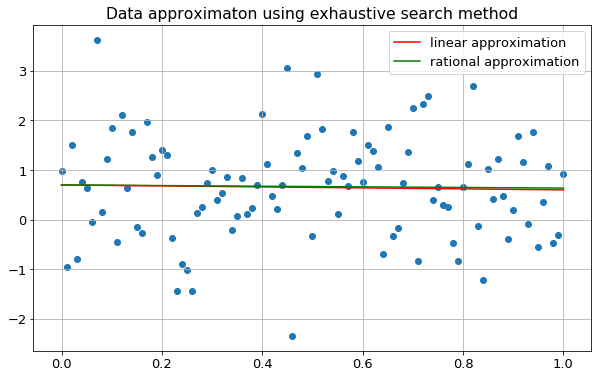

In [580]:
from scipy.optimize import minimize

# least_squares_func(*args, **kwargs) == D([a, b], [x_k], [y_k]), where args = [a, b]

def least_squares_linear(args, x_k, y_k):
    return np.sum(np.square(args[0] * x_k + args[1] - y_k))


def least_squares_rational(args, x_k, y_k):
    return np.sum(np.square(args[0] / (1 + args[1] * x_k) - y_k))


def exhaustive_search_mult(func, x_arr, y_arr, left_boundary = -1, right_boundary = 1, eps = 1e-1):
    
    """ eps = 1e-1 by dafult, because with eps = 1e-3 it takes too much time """
    
    nodes_num = int(1 + (right_boundary - left_boundary) / eps)     # number of nodes in each grid for a and b == len(grid)
    grid = np.linspace(left_boundary, right_boundary, nodes_num)    # grid of values of a and b
    
    func_eval_num = 0
    iter_num = 0
    
    a_min, b_min = grid[0], grid[0]                                 
    func_min = func([a_min, b_min], x_arr, y_arr)    
    func_eval_num += 1
        
    for i in range(nodes_num):                                      # exhaustive search part
        for j in range(nodes_num):
            if (i != 0) and (j != 0):
                
                func_curr = func([grid[i], grid[j]], x_arr, y_arr) 
                func_eval_num += 1
                iter_num += 1

                if func_curr < func_min:
                    a_min, b_min = grid[i], grid[j]
                    func_min = func_curr
    
    return a_min, b_min, func_eval_num, iter_num


def coordinate_descent_mult(func, x_arr, y_arr, initial_aprox = [0, 0], eps = 1e-3):
    pass


def Nelder_Mead_mult(func, x_arr, y_arr, initial_aprox = [0, 0], eps = 1e-3, disp = False):
    
    res = minimize(func, initial_aprox, args = (x_arr, y_arr), method = 'nelder-mead', options = {'xatol': eps, 'disp': disp})
    
    return res.x[0], res.x[1], res.nfev, res.nit


# Testing
a_lin, b_lin, func_eval_lin, iter_num_lin = exhaustive_search_mult(least_squares_linear, x_arr, y_arr)
a_rat, b_rat, func_eval_rat, iter_num_rat = exhaustive_search_mult(least_squares_rational, x_arr, y_arr)

plt.figure(figsize = (10, 6))
plt.title('Data approximaton using exhaustive search method')
plt.scatter(x_arr, y_arr)

plt.plot(x_arr, a_lin * x_arr + b_lin, c = 'r')
plt.plot(x_arr, a_rat / (1 + x_arr * b_rat), c = 'g')

plt.legend(['linear approximation', 'rational approximation'], loc = 'best')
plt.grid()

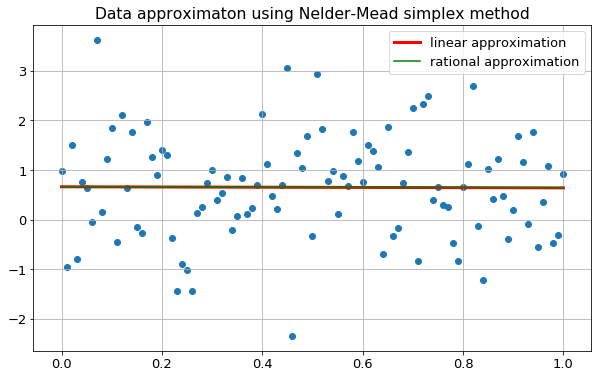

In [581]:
plt.figure(figsize = (10, 6))
plt.title('Data approximaton using Nelder-Mead simplex method')
plt.scatter(x_arr, y_arr)

a_lin, b_lin, func_eval_lin, iter_num_lin = Nelder_Mead_mult(least_squares_linear, x_arr, y_arr)
plt.plot(x_arr, a_lin * x_arr + b_lin, c = 'r', linewidth = 3.0)

a_rat, b_rat, func_eval_rat, iter_num_rat = Nelder_Mead_mult(least_squares_rational, x_arr, y_arr)
plt.plot(x_arr, a_rat / (1 + x_arr * b_rat), c = 'g')

plt.legend(['linear approximation', 'rational approximation'], loc = 'best')
plt.grid()